<a href="https://colab.research.google.com/github/dan9133/Bharat_intern_tesla_stock_prediction_Analysis/blob/main/Python_TESLA_Stock_Price_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:-  to make informed investment decisions or to gain insights into the future performance of Tesla's stock**

**Investment Decision Making:- Many investors, both individual and institutional, rely on stock price predictions to make buy or sell decisions. By forecasting Tesla's stock price, investors aim to make profitable investments or avoid potential losses**

**Risk Management: Predicting stock prices can help investors and traders assess and manage the risk associated with their investments. It allows them to determine potential**

**Financial Research: Analysts and financial professionals use stock price predictions as part of their research and analysis. This can inform investment recommendations and financial reports**

In [1]:
# import all labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
%matplotlib inline

In [2]:
# import dataset
tesla = pd.read_csv("/content/TESLA.csv",index_col=['Date'], parse_dates=['Date'])
tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
...,...,...,...,...,...,...
2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200


In [33]:
# find the describe
tesla_series.describe()

count    253.000000
mean     299.709104
std       45.788283
min      209.386673
25%      266.923340
50%      296.666656
75%      336.336670
max      409.970001
Name: Close, dtype: float64

In [37]:
# find the null vlaues
tesla_series.isnull()

Date
2021-09-29    False
2021-09-30    False
2021-10-01    False
2021-10-04    False
2021-10-05    False
              ...  
2022-09-23    False
2022-09-26    False
2022-09-27    False
2022-09-28    False
2022-09-29    False
Name: Close, Length: 253, dtype: bool

**Isolating the close column**

In [3]:
tesla_series = tesla['Close']
tesla_series

Date
2021-09-29    260.436676
2021-09-30    258.493347
2021-10-01    258.406677
2021-10-04    260.510010
2021-10-05    260.196655
                 ...    
2022-09-23    275.329987
2022-09-26    276.010010
2022-09-27    282.940002
2022-09-28    287.809998
2022-09-29    268.209991
Name: Close, Length: 253, dtype: float64

**plotting the close data**

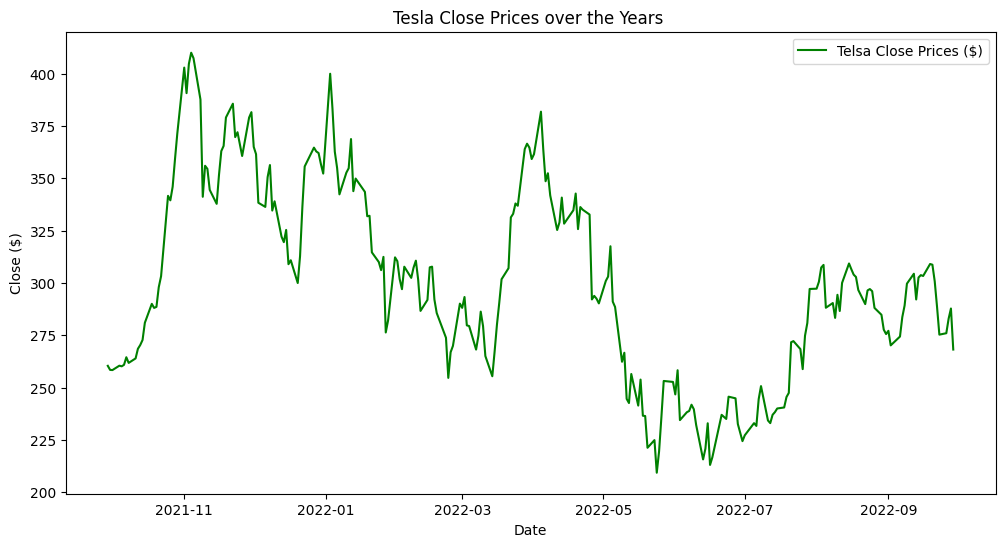

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(tesla_series.index, tesla_series, label='Telsa Close Prices ($)', color='green')
plt.title('Tesla Close Prices over the Years ')
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.legend()
plt.show()

In [5]:
mean_tesla_close = tesla_series.mean()
std_deviation = tesla_series.std()
print(mean_tesla_close)
print(std_deviation)

299.70910395652174
45.78828270953262


**Creating a 5 day Rolling Average**

In [6]:
rolling_mean = tesla_series.rolling(window=5).mean()

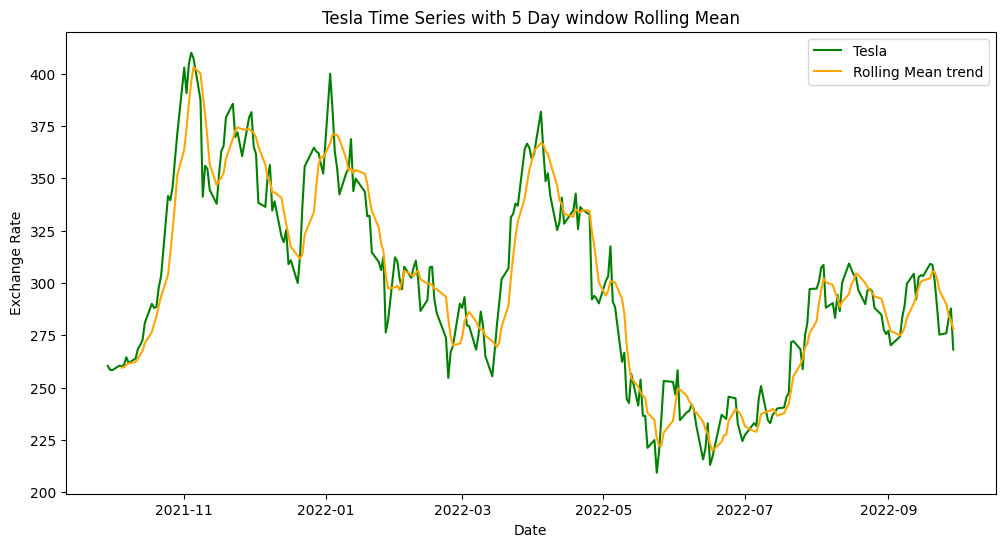

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(tesla_series.index, tesla_series, label='Tesla', color='green')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean trend', color='orange')
plt.title('Tesla Time Series with 5 Day window Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [8]:
tesla_series1 = tesla[['Close']]
tesla_series1

,Close
Date,
2021-09-29,260.436676
2021-09-30,258.493347
2021-10-01,258.406677
2021-10-04,260.510010
2021-10-05,260.196655
...,...
2022-09-23,275.329987
2022-09-26,276.010010
2022-09-27,282.940002


**Time Series with Keras**

In [15]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Normalize the data
scaler = MinMaxScaler()
tesla_series1= scaler.fit_transform(tesla_series1)

# Split the data into training and testing sets
train_size = int(len(tesla_series1) * 0.80)
test_size = len(tesla_series1) - train_size
train_data, test_data = tesla_series1[0:train_size], tesla_series1[train_size:len(tesla_series1)]

# Create sequences for time series forecasting
def create_sequences(tesla_series1, look_back):
      X, y = [], []
      for i in range(len(tesla_series1) - look_back):

        X.append(tesla_series1[i:(i+look_back), 0])
        y.append(tesla_series1[i + look_back, 0])

      return np.array(X), np.array(y)

look_back = 10  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=2000, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE (Root Mean Squared Error) to evaluate the model
train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print(f"Train RMSE: {train_score:.4f}")
print(f"Test RMSE: {test_score:.4f}")

Epoch 1/2000
6/6 [==============================] - 2s 10ms/step - loss: 0.2604
Epoch 2/2000
6/6 [==============================] - 0s 9ms/step - loss: 0.1603
Epoch 3/2000
6/6 [==============================] - 0s 11ms/step - loss: 0.0515
Epoch 4/2000
6/6 [==============================] - 0s 9ms/step - loss: 0.0537
Epoch 5/2000
6/6 [==============================] - 0s 9ms/step - loss: 0.0303
Epoch 6/2000
6/6 [==============================] - 0s 10ms/step - loss: 0.0333
Epoch 7/2000
6/6 [==============================] - 0s 10ms/step - loss: 0.0278
Epoch 8/2000
6/6 [==============================] - 0s 10ms/step - loss: 0.0232
Epoch 9/2000
6/6 [==============================] - 0s 12ms/step - loss: 0.0217
Epoch 10/2000
6/6 [==============================] - 0s 9ms/step - loss: 0.0191
Epoch 11/2000
6/6 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 12/2000
6/6 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 13/2000
6/6 [========================

**Graphing the Keras Model**

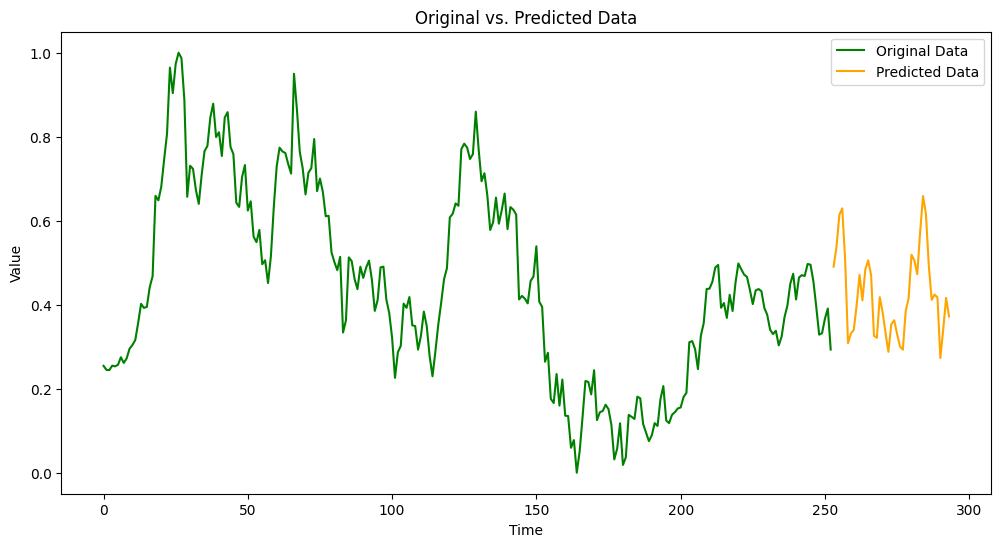

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(tesla_series1)), tesla_series1, label='Original Data', color='green')
plt.plot(np.arange(len(tesla_series1), len(tesla_series1) + len(test_predict)), test_predict, label='Predicted Data', color='orange')
plt.legend()
plt.title('Original vs. Predicted Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

**Predicting future prices**

In [17]:
tesla_preds= tesla['Close']
tesla_preds

Date
2021-09-29    260.436676
2021-09-30    258.493347
2021-10-01    258.406677
2021-10-04    260.510010
2021-10-05    260.196655
                 ...    
2022-09-23    275.329987
2022-09-26    276.010010
2022-09-27    282.940002
2022-09-28    287.809998
2022-09-29    268.209991
Name: Close, Length: 253, dtype: float64

In [18]:
log_returns_tesla = np.log(1+ tesla_preds.pct_change())
log_returns_tesla.tail()

Date
2022-09-23   -0.047037
2022-09-26    0.002467
2022-09-27    0.024798
2022-09-28    0.017066
2022-09-29   -0.070530
Name: Close, dtype: float64

In [19]:
u = log_returns_tesla.mean()
var = log_returns_tesla.var()
print(u)
print(var)

0.00011670824180026673
0.0016524670034425218


In [20]:
stdev = log_returns_tesla.std()
stdev

0.04065054739413138

In [21]:
drift = u -(0.5 * var) # u = average log return - half variance
drift

-0.0007095252599209941

In [22]:
np.array(drift)

array(-0.00070953)

In [23]:
norm.ppf(0.95)

1.6448536269514722

In [24]:
x = np.random.rand(10,2) # to complete the second component aka volatility need to randomize using numpy. (10,2) turn our arrray into a multi dimensional one 2 columns by 10 r
x

array([[0.43278733, 0.84934221],
       [0.58692901, 0.06509361],
       [0.27686181, 0.79557545],
       [0.37571784, 0.94447655],
       [0.74144257, 0.71873576],
       [0.23541273, 0.90099974],
       [0.33827594, 0.84577392],
       [0.09601492, 0.68956609],
       [0.06348131, 0.38468714],
       [0.80629987, 0.95122512]])

In [25]:
norm.ppf(x)

array([[-0.16928223,  1.03361631],
       [ 0.21965226, -1.51336399],
       [-0.59218962,  0.82592066],
       [-0.31674686,  1.59350521],
       [ 0.64779915,  0.57908994],
       [-0.72113662,  1.28726905],
       [-0.41717299,  1.01847525],
       [-1.30459782,  0.4946208 ],
       [-1.52618972, -0.29319347],
       [ 0.86434162,  1.65685018]])

In [26]:
t_intervals = 365 # tintervals = time intervals. interested in forecast stock prices for next 1000 days
iterations = 5

In [27]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.95708439, 1.05667083, 1.02071448, 1.05314362, 1.02054459],
       [0.94908594, 0.96371137, 1.09418571, 0.96052642, 1.00769501],
       [0.99904109, 0.97151896, 0.93434135, 1.05053923, 0.93868025],
       ...,
       [1.01212894, 0.94788068, 1.05114026, 0.98364065, 0.9986706 ],
       [1.00544178, 1.04929687, 1.02600032, 1.02421404, 1.00672947],
       [0.99673429, 0.9895843 , 0.9815842 , 0.96186848, 0.97388735]])

In [28]:
S0 = tesla_preds.iloc[-1]
S0

268.209991

In [29]:
prices_list= np.zeros_like(daily_returns) #zeros_like Return an array of zeros with the same shape and type as a given array
prices_list


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [30]:
prices_list[0] = S0 # 1st row of prices_list must equal S0. as S0 will be the inital price for each of the iterations intended to be generated
prices_list

array([[268.209991, 268.209991, 268.209991, 268.209991, 268.209991],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       ...,
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ]])

In [31]:
for t  in range(1, t_intervals): # this loop starts at day 1 and ends of day 1000
  prices_list[t] = prices_list[t-1] * daily_returns[t]

prices_list

array([[268.209991  , 268.209991  , 268.209991  , 268.209991  ,
        268.209991  ],
       [254.55433131, 258.47701665, 293.47153921, 257.6227819 ,
        270.27386915],
       [254.31023713, 251.11532338, 274.20259493, 270.64283851,
        253.70074303],
       ...,
       [205.61660079, 929.19165431, 131.80255421, 126.75152183,
         66.66837646],
       [206.73552169, 974.99789036, 135.22946221, 129.82068826,
         67.11701961],
       [206.06038275, 964.84260694, 132.73910378, 124.87042825,
         65.36441668]])

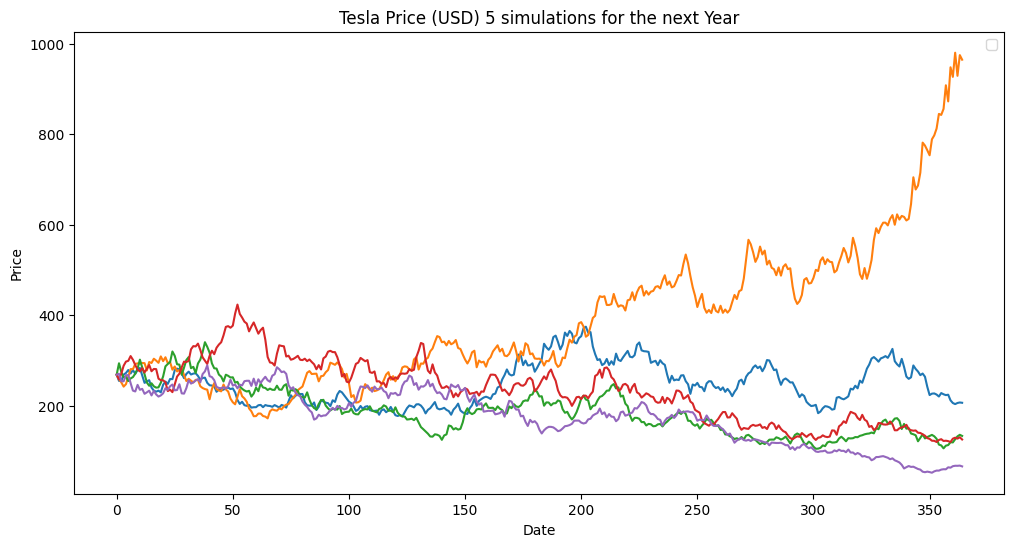

In [32]:
plt.figure(figsize=(12,6))
plt.plot(prices_list)
plt.title('Tesla Price (USD) 5 simulations for the next Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**summary:- A dataset related to Tesla's stock prices, which can be used for predictive analysis using the Python programming language. The dataset likely contains historical price data for Tesla's stock, use Python for building models that can forecast or predict future stock prices. Such predictive modeling can have various applications, including investment decision-making, risk assessment, portfolio optimization, algorithmic trading, and financial research.**